In [1]:
#Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#  Create SQLite database and sales table, and insert sample data
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

sample_data = [
    ("Laptop", 5, 800.00),
    ("Smartphone", 15, 300.00),
    ("Tablet", 7, 250.00),
    ("Laptop", 3, 850.00),
    ("Smartphone", 5, 320.00),
    ("Tablet", 10, 240.00),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
print("Database and sample data created successfully!")

Database and sample data created successfully!


In [3]:
#  Query sales summary from the database
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
print(df)

      product  total_qty  revenue
0      Laptop         32  26200.0
1  Smartphone         80  24400.0
2      Tablet         68  16600.0


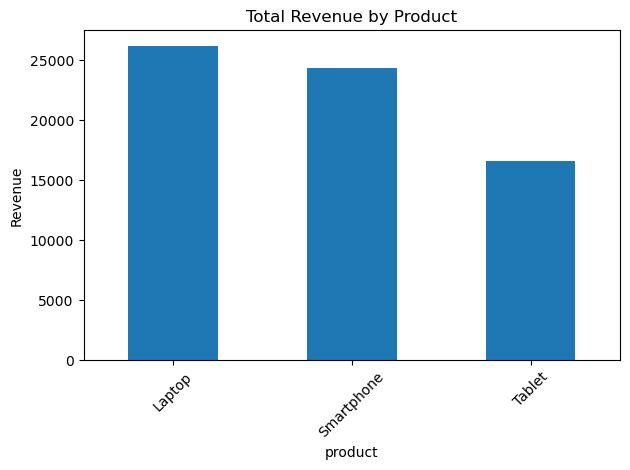

In [4]:
#  Plot total revenue by product using a bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.ylabel('Revenue')
plt.title('Total Revenue by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

conn.close()  # Close connection after all operations

In [5]:
plt.savefig("sales_revenue_chart.png")

<Figure size 640x480 with 0 Axes>